# Plot Data on a Map

### Work in progress notebook

In [7]:
import xarray as xr

ds = xr.open_dataset('https://thredds.met.no/thredds/dodsC/remotesensingenvisat/asar-doppler/2012/01/27/ASA_WSDV2PRNMI20120127_215005_000612433111_00101_51839_0000.nc')

ds

<xarray.Dataset> Size: 39MB
Dimensions:             (y: 602, x: 851)
Dimensions without coordinates: y, x
Data variables: (12/19)
    sensor_view_angle   (y, x) float32 2MB ...
    incidence_angle     (y, x) float32 2MB ...
    sensor_azimuth      (y, x) float32 2MB ...
    sigma0_VV           (y, x) float32 2MB ...
    topographic_height  (y, x) float32 2MB ...
    valid_land_doppler  (y, x) float32 2MB ...
    ...                  ...
    u_range             (y, x) float32 2MB ...
    std_u_range         (y, x) float32 2MB ...
    wind_direction      (y, x) float32 2MB ...
    wind_speed          (y, x) float32 2MB ...
    longitude           (y, x) float32 2MB ...
    latitude            (y, x) float32 2MB ...
Attributes: (12/75)
    GDAL:                       GDAL 3.2.1, released 2020/12/29
    acknowledgement:            GSAR IDL pre-processing software was develope...
    azimuth_start_time:         2012-01-27T21:50:05.173597
    contributor_email:          jeong-won.park@kopri.re.kr, hjoh@norceresearc...
    contributor_institution:    Korea Polar Research Institute (KOPRI), NORCE...
    contributor_name:           Jeong-Won Park, Harald Johnsen, Geir Engen
    ...                         ...
    ysamplefreq_slc:            1711.9144385026736
    ysize:                      629
    ytime:                      2012-01-27T21:50:05.173597Z
    ytime_slc:                  2012-01-27T21:50:04.077748
    summary_no:                 Kalibrert geofysisk Dopplerskift fra ENVISAT ...
    title_no:                   Kalibrert geofysisk ENVISAT ASAR Dopplerskift...

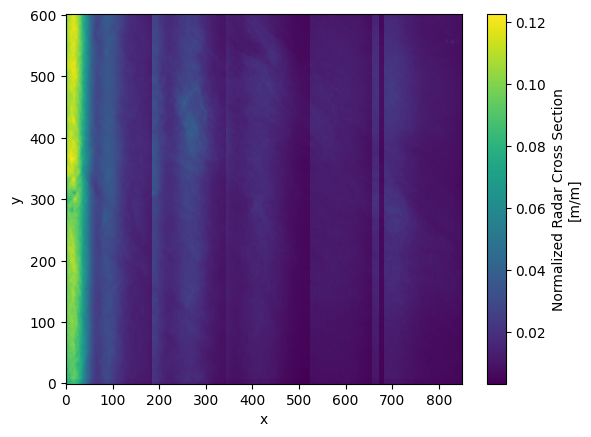

In [8]:
ds.sigma0_VV.plot()

In [9]:
# how to open data when downloaded from the staging page: https://data-staging.met.no/metsis/elements/no-met-staging-e19b9c36-a9dc-4e13-8827-c998b9045b54/search
import os
import glob
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.colors import TwoSlopeNorm

# Get the path of the home directory
home_dir = os.path.expanduser("~")

# Use os.path.join to combine paths
path2files = os.path.join(home_dir, "Downloads") # "Dowloads" --> path to files

# Specify something to recognice the desired nc-files, extract them and put them in a list
desired_files_paths = glob.glob(os.path.join(path2files, "ASA_*.nc"))
# print(desired_files_paths)

'''
# Create a list of desired files
files2open = []
for i in range(len(desired_files_paths)):
    ith_file = desired_files_paths[i].replace(path2files+'/', '')
    print(ith_file)
    files2open.append(ith_file)

print(files2open)
#'''

# Open the first dataset
ds = xr.open_dataset(desired_files_paths[0])
# print(desired_files_paths[0])

# Interactive overview of the dataset
ds

<xarray.Dataset> Size: 39MB
Dimensions:             (y: 602, x: 851)
Dimensions without coordinates: y, x
Data variables: (12/19)
    sensor_view_angle   (y, x) float32 2MB ...
    incidence_angle     (y, x) float32 2MB ...
    sensor_azimuth      (y, x) float32 2MB ...
    sigma0_VV           (y, x) float32 2MB ...
    topographic_height  (y, x) float32 2MB ...
    valid_land_doppler  (y, x) float32 2MB ...
    ...                  ...
    u_range             (y, x) float32 2MB ...
    std_u_range         (y, x) float32 2MB ...
    wind_direction      (y, x) float32 2MB ...
    wind_speed          (y, x) float32 2MB ...
    longitude           (y, x) float32 2MB ...
    latitude            (y, x) float32 2MB ...
Attributes: (12/75)
    GDAL:                       GDAL 3.2.1, released 2020/12/29
    acknowledgement:            GSAR IDL pre-processing software was develope...
    azimuth_start_time:         2012-01-27T21:50:05.173597
    contributor_email:          jeong-won.park@kopri.re.kr, hjoh@norceresearc...
    contributor_institution:    Korea Polar Research Institute (KOPRI), NORCE...
    contributor_name:           Jeong-Won Park, Harald Johnsen, Geir Engen
    ...                         ...
    ysamplefreq_slc:            1711.9144385026736
    ysize:                      629
    ytime:                      2012-01-27T21:50:05.173597Z
    ytime_slc:                  2012-01-27T21:50:04.077748
    summary_no:                 Kalibrert geofysisk Dopplerskift fra ENVISAT ...
    title_no:                   Kalibrert geofysisk ENVISAT ASAR Dopplerskift...

In [10]:
# Same file that is inspected above
ds = xr.open_dataset('ASA_WSDV2PRNMI20120127_215005_000612433111_00101_51839_0000.nc')
ds

<xarray.Dataset> Size: 39MB
Dimensions:             (y: 602, x: 851)
Dimensions without coordinates: y, x
Data variables: (12/19)
    sensor_view_angle   (y, x) float32 2MB ...
    incidence_angle     (y, x) float32 2MB ...
    sensor_azimuth      (y, x) float32 2MB ...
    sigma0_VV           (y, x) float32 2MB ...
    topographic_height  (y, x) float32 2MB ...
    valid_land_doppler  (y, x) float32 2MB ...
    ...                  ...
    u_range             (y, x) float32 2MB ...
    std_u_range         (y, x) float32 2MB ...
    wind_direction      (y, x) float32 2MB ...
    wind_speed          (y, x) float32 2MB ...
    longitude           (y, x) float32 2MB ...
    latitude            (y, x) float32 2MB ...
Attributes: (12/75)
    GDAL:                       GDAL 3.2.1, released 2020/12/29
    acknowledgement:            GSAR IDL pre-processing software was develope...
    azimuth_start_time:         2012-01-27T21:50:05.173597
    contributor_email:          jeong-won.park@kopri.re.kr, hjoh@norceresearc...
    contributor_institution:    Korea Polar Research Institute (KOPRI), NORCE...
    contributor_name:           Jeong-Won Park, Harald Johnsen, Geir Engen
    ...                         ...
    ysamplefreq_slc:            1711.9144385026736
    ysize:                      629
    ytime:                      2012-01-27T21:50:05.173597Z
    ytime_slc:                  2012-01-27T21:50:04.077748
    summary_no:                 Kalibrert geofysisk Dopplerskift fra ENVISAT ...
    title_no:                   Kalibrert geofysisk ENVISAT ASAR Dopplerskift...

# Plotting Function

Below is an easy to use plotting function which visualize your desired data variable on a map. There is also possible to set the spatial extent of the plot yourself - default is just plotting the spatial extent of the variable itself as defined in the metadata.

In [11]:
def plotting_variables_on_a_map(variable, number_of_colorbar_intervals, lat_min = ds.geospatial_lat_min, lat_max = ds.geospatial_lat_max, lon_min = ds.geospatial_lon_min, lon_max = ds.geospatial_lon_max):  # var_min, var_max, var_step

    # Create a linear space for latitude and longitude
    lat = np.linspace(ds.geospatial_lat_min, ds.geospatial_lat_max, ds.sizes['y'])
    lon = np.linspace(ds.geospatial_lon_min, ds.geospatial_lon_max, ds.sizes['x'])

    # Create a new xarray DataArray with latitude and longitude as coordinates
    variable_with_coords = xr.DataArray(variable.values, coords=[('lat', lat), ('lon', lon)], dims=['y', 'x'])

    # Assign variable attributes from the original variable DataArray
    variable_with_coords.attrs = variable.attrs

    # Now select your slice - defined by the latitudinal and longitudinal extent of the data
    plotable_variable = variable_with_coords.sel(x=slice(ds.geospatial_lon_min, ds.geospatial_lon_max), y=slice(ds.geospatial_lat_min, ds.geospatial_lat_max))

    # Ready to plot the variable on a map using subplot package of matplotlib.pyplot
    fig, ax = plt.subplots(1, figsize=(7, 7))
    fig.suptitle(f'{plotable_variable.long_name}', fontsize = 15)
    ax.axis('off')   # Turn off axes

    # Set the projection
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()  # Add coastlines

    # Create the gridlines and configure the labels
    gl = ax.gridlines(draw_labels=True)
    gl.bottom_labels = True   # Default
    gl.left_labels = True     # Default
    gl.top_labels = False     # Not default
    gl.right_labels = False   # Not default

    # Defining var_min, var_max and var_step --- using the variable attribute minmax to extract var_min and var_max
    var_min = int(plotable_variable.minmax.split(' ')[0])
    var_max = int(plotable_variable.minmax.split(' ')[1])
    
    var_step = ((var_max - var_min) / number_of_colorbar_intervals)

    var_max = int(plotable_variable.minmax.split(' ')[1]) + var_step   # redefining the max val to improve visuals of colorbar around center

    # Plot the data
    plotable_variable.plot.contourf(ax=ax, x='x', y='y',
                        extend='neither',
                        norm=TwoSlopeNorm(vmin=var_min, vcenter=0, vmax=var_max),
                        levels=np.arange(var_min, var_max, var_step),      
                        cbar_kwargs = {'label': f'[{plotable_variable.units}]'}
                        )

    # Setting the extent on the map that is plotted
    ax.set_ylim(lat_min, lat_max)
    ax.set_xlim(lon_min, lon_max)

    plt.tight_layout()
    plt.show()

# Plotting Examples

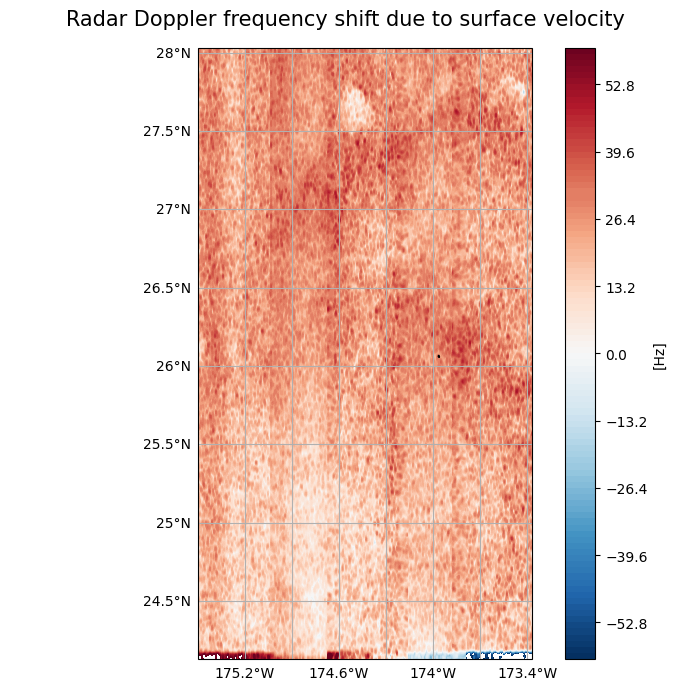

In [12]:
# Plotting the desired variable within its geographical extent - By default using the metadata for the geographical extent as lat/lon min/max values.

# Plotting fdg
plotting_variables_on_a_map(variable = ds.fdg,
                            number_of_colorbar_intervals = 100
                            )

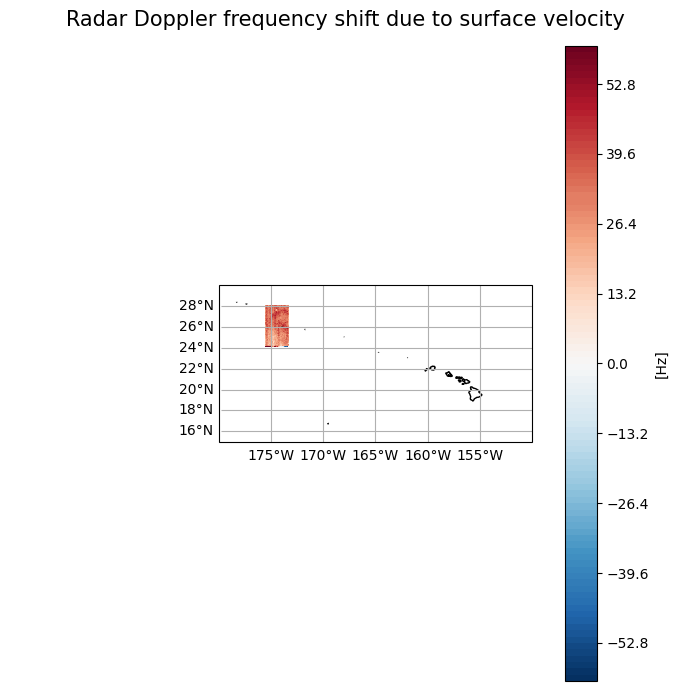

In [13]:
# Determine the spatial extent for yourself:

# Plotting fdg
plotting_variables_on_a_map(variable = ds.fdg, 
                            lat_min = 15, lat_max = 30,
                            lon_min = -200, lon_max = -150,
                            number_of_colorbar_intervals = 100
                            )

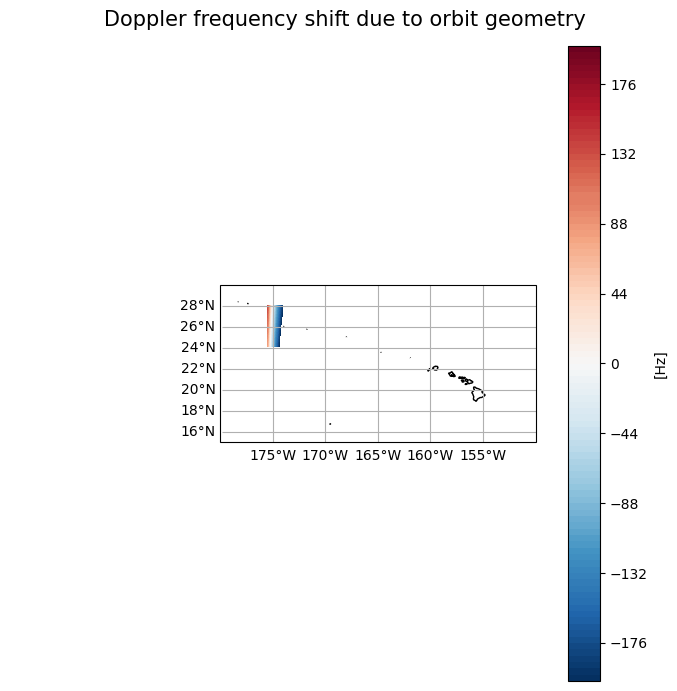

In [14]:
# Plotting fgeo
plotting_variables_on_a_map(variable = ds.fgeo, 
                            # lat_min = 20, lat_max = 50,
                            # lon_min = -85, lon_max = -65 
                            lat_min = 15, lat_max = 30,
                            lon_min = -200, lon_max = -150,
                            number_of_colorbar_intervals = 100
                            )

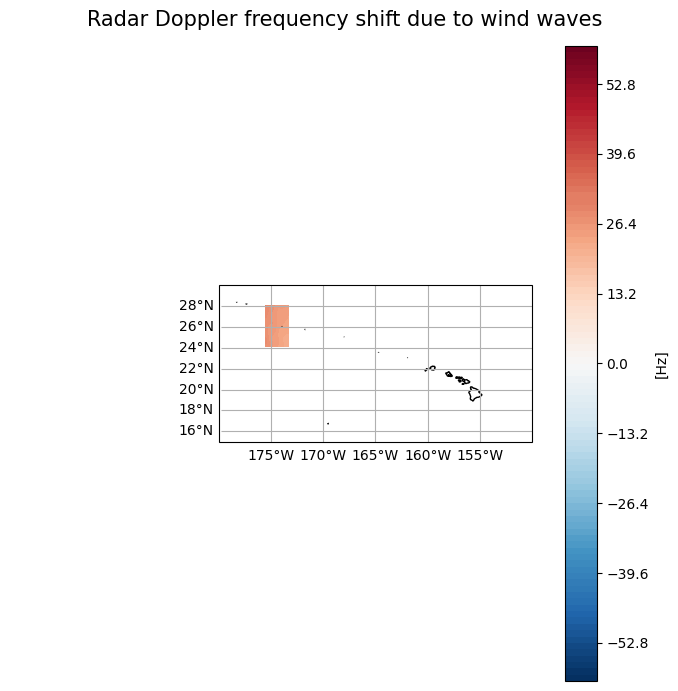

In [15]:
# Plotting fww
plotting_variables_on_a_map(variable = ds.fww, 
                            # lat_min = 20, lat_max = 50,
                            # lon_min = -85, lon_max = -65 
                            lat_min = 15, lat_max = 30,
                            lon_min = -200, lon_max = -150,
                            number_of_colorbar_intervals = 100
                            )

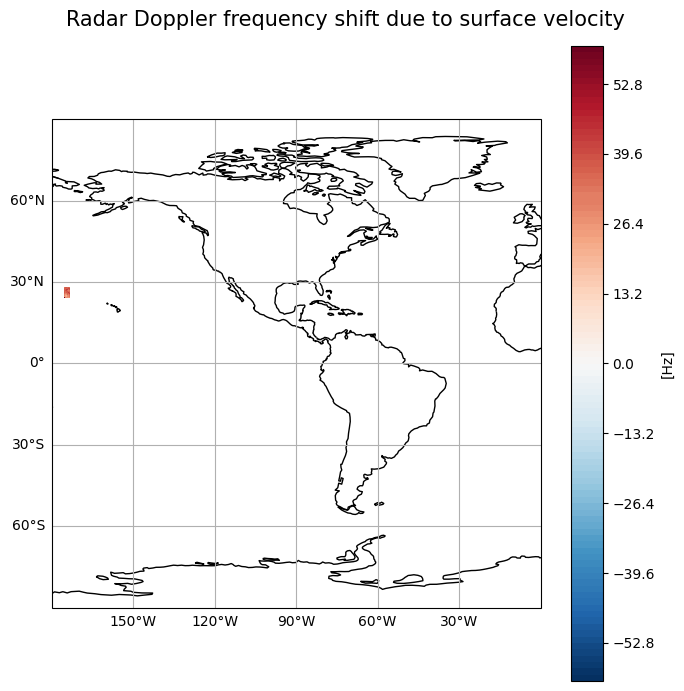

In [16]:
# Plotting half the world for the sake of it

# Plotting fdg
plotting_variables_on_a_map(variable = ds.fdg, 
                            lat_min = -90, lat_max = 90,
                            lon_min = -180, lon_max = 0, 
                            number_of_colorbar_intervals = 100
                            )